# Import Libraries

we are importing libraries below

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
plt.rcParams['font.size'] = 24
import seaborn as sns
from IPython.core.pylabtools import figsize

We are loading the data 


[Click for Data Set](https://drive.google.com/file/d/14H5oc-rbGh29n4E2glYjphSK58FWauGV/view?usp=sharing)


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DATA SETS/diabetes.csv')
df

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,False
764,2,122,70,27,0,36.8,0.340,27,False
765,5,121,72,23,112,26.2,0.245,30,False
766,1,126,60,0,0,30.1,0.349,47,True


In [ ]:
df.describe()# we are discriibing the dataset

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
df.isnull().sum()# we are checking theb null value but here is no null values

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

In [ ]:
df.info() #  we are getting info. about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 48.9 KB


here we findeing the density of bmi

bmi means Body mass index (weight in kg/(height in m)^2) it is a mesurement of body fitness.average bmi of body should be 25-29.9.

BMI ranges
below 18.5 – you're in the underweight range. between 18.5 and 24.9 – you're in the healthy weight range. between 25 and 29.9 – you're in the overweight range. between 30 and 39.9 – you're in the obese range.

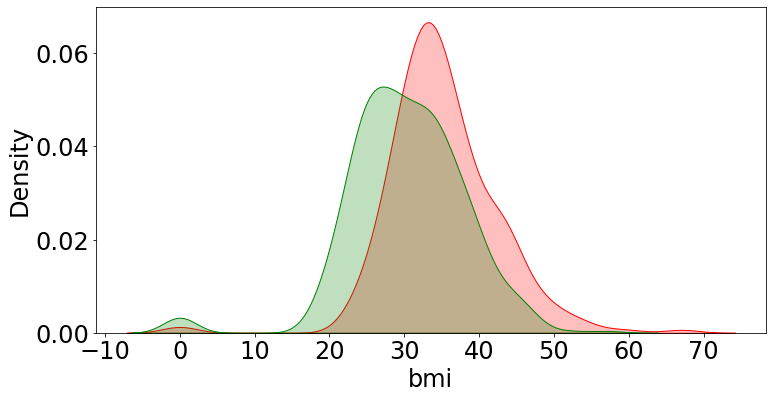

In [ ]:
plt.figure(figsize=(12,6)) # here  we are plotting density plot with respect of BMI 

sns.kdeplot(df[df['outcome']==1]['bmi'],shade=True,color='red') # for out come true
sns.kdeplot(df[df['outcome']==0]['bmi'],shade=True,color='green') # for out come fales

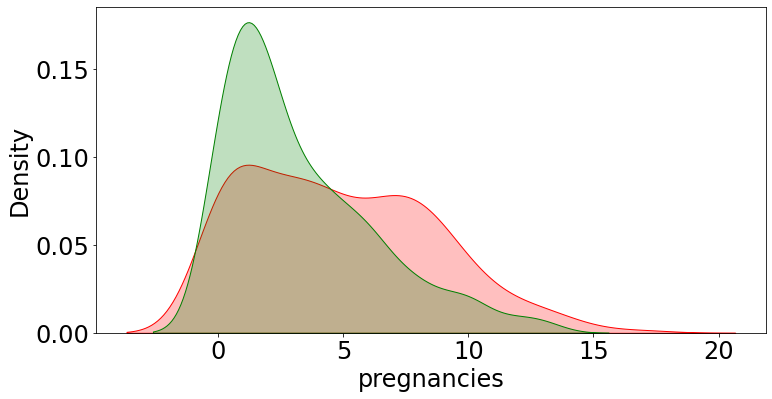

In [ ]:
plt.figure(figsize=(12,6))

sns.kdeplot(df[df['outcome']==1]['pregnancies'],shade=True,color='red') # density plot for pragnancies respect to outcomm=True
sns.kdeplot(df[df['outcome']==0]['pregnancies'],shade=True,color='green')#density plot for pragnancies respect to outcomm=False

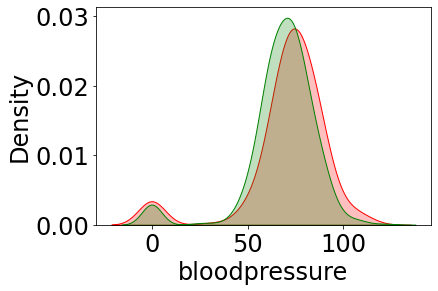

In [ ]:
sns.kdeplot(df[df['outcome']==1]['bloodpressure'],shade=True,color='red')
sns.kdeplot(df[df['outcome']==0]['bloodpressure'],shade=True,color='green')

In [ ]:
# above we can see that (50 to 100 )bloodpressure is so high

## **Corelation**

co-relation means relation between two dependent variable . Now we will find the corelation with all vaeriable

In [ ]:
cor_mat =df.corr()
cor_mat

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bloodpressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skinthickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetespedigreefunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Bellow we are ploting heatmap for analysis of corelation between variables 

we can see bellow their are some positive relation and negative corelation in here if we talk about insulin and age  their are negative corelation that means if age will increase ,insulin level will decrease.

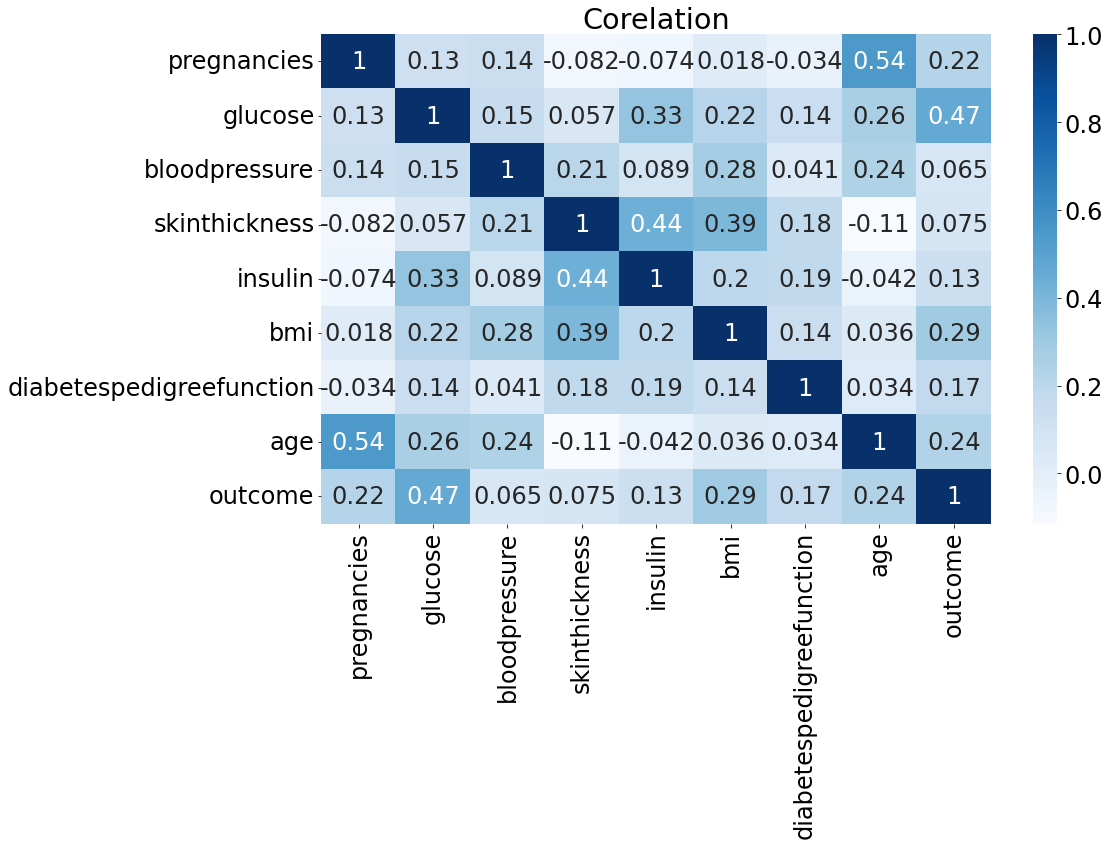

In [ ]:
plt.figure(figsize=(15,9))
plt.title('Corelation')
sns.heatmap(cor_mat,annot=True,cmap='Blues')
plt.show()

Now we are 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

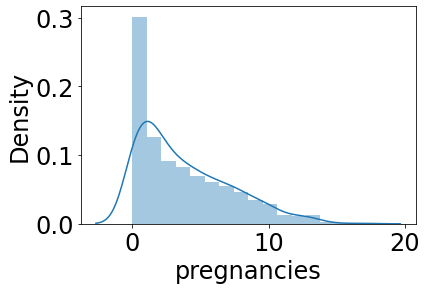

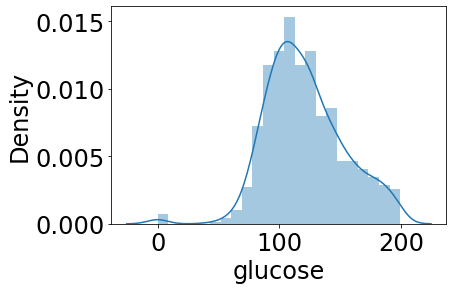

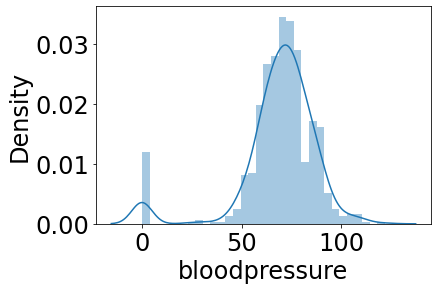

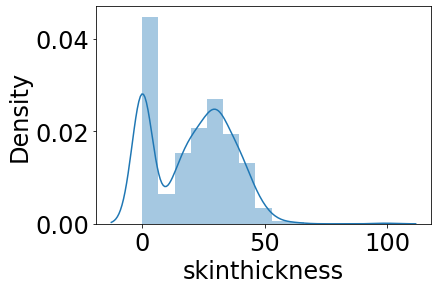

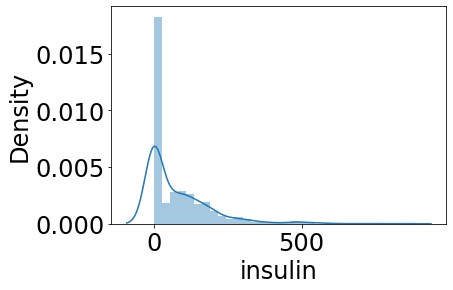

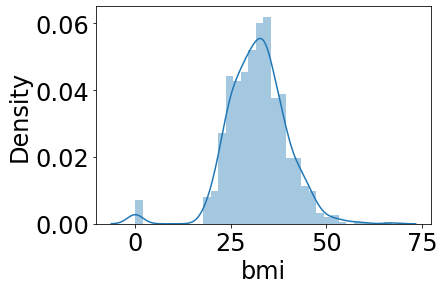

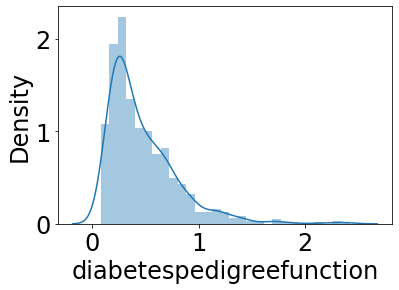

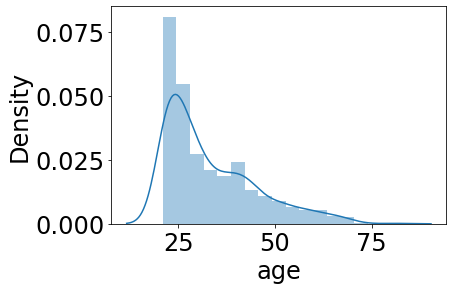

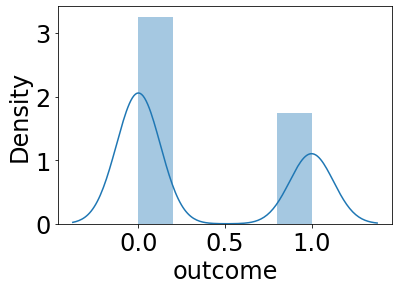

In [ ]:
for column in df.columns:
    plt.figure()
    sns.distplot(df[column])


In [ ]:
p= pd.get_dummies(df, columns=['outcome' ], drop_first= True)
#get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.
y=df.iloc[:,-1]
x=df.drop(['outcome'],axis=1)

In [ ]:
x
y

0       True
1      False
2       True
3      False
4       True
       ...  
763    False
764    False
765    False
766     True
767    False
Name: outcome, Length: 768, dtype: bool

In [ ]:
from sklearn.preprocessing import StandardScaler # we are importing standard scaler for standardization 
sc = StandardScaler()
sc.fit_transform(x)

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123) # we have splited the dataset for train and test

In [ ]:
from sklearn.linear_model import LogisticRegression # we import logistic Regression for prediction
lg = LogisticRegression()
lg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = lg.predict(x_test)
y_pred# we are predicting now

array([ True,  True,  True, False, False,  True,  True, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False,  True, False, False,  True,  True, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
        True, False,  True, False, False,  True, False,  True,  True,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True, False,  True,  True,  True, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False,

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7922077922077922


In [ ]:
# WE are checking accuracy

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #We are predicting with Decision Tree method
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred1 = dt.predict(x_test)
y_pred1

array([False, False,  True, False, False, False,  True,  True,  True,
        True,  True,  True, False, False,  True, False,  True, False,
       False, False,  True,  True, False,  True,  True, False, False,
       False,  True,  True, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False,  True, False,  True,
       False,  True, False,  True,  True, False, False, False,  True,
        True, False,  True, False, False,  True, False, False, False,
        True, False,  True, False, False,  True, False,  True,  True,
       False, False, False, False,  True, False,  True,  True, False,
        True,  True, False, False, False, False,  True, False,  True,
        True, False, False, False,  True, False,  True,  True, False,
        True, False,  True, False,  True,  True, False, False,  True,
        True, False,

In [ ]:
print(accuracy_score(y_test,y_pred1))

0.7792207792207793


In [ ]:
from sklearn.ensemble import RandomForestClassifier#we are predicting with RandomForestClassifier Model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred2=rf.predict(x_test)
y_pred2


array([ True, False,  True, False, False,  True,  True, False,  True,
        True,  True, False, False,  True,  True, False, False, False,
       False, False,  True, False, False,  True,  True, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False,  True, False,  True, False,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False,  True, False, False,
        True, False,  True, False, False,  True, False,  True,  True,
       False,  True, False, False,  True, False,  True,  True, False,
       False, False,  True, False, False, False,  True, False,  True,
        True, False,  True, False,  True,  True, False, False, False,
        True, False,  True, False,  True,  True, False, False,  True,
       False, False,

In [ ]:
print(accuracy_score(y_test,y_pred2))

0.7727272727272727


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

In [ ]:
model1 = Sequential()
model1.add(Dense(32,input_shape=(x_train.shape[1],)))
model1.add(Activation('relu'))
model1.add(Dense(64,input_shape=(x_train.shape[1],)))
model1.add(Activation('relu'))
model1.add(Dense(64,input_shape=(x_train.shape[1],)))
model1.add(Activation('relu'))
model1.add(Dense(128,input_shape=(x_train.shape[1],)))
model1.add(Activation('relu'))
model1.add(Dense(128,input_shape=(x_train.shape[1],)))
model1.add(Activation('relu'))
model1.add(Dense(256,input_shape=(x_train.shape[1],)))
model1.add(Activation('relu'))
model1.add(Dense(256,input_shape=(x_train.shape[1],)))
model1.add(Activation('relu'))
model1.add(Dense(2))
model1.add(Activation('softmax'))

In [ ]:
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",metrics=['accuracy'])
history=model1.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(x_test, y_test))
loss, accuracy = model1.evaluate(x_test,y_test, verbose=0)

Epoch 1/100
5/5 [==============================] - 1s 76ms/step - loss: 1.9119 - accuracy: 0.6091 - val_loss: 0.7926 - val_accuracy: 0.4935
Epoch 2/100
5/5 [==============================] - 0s 17ms/step - loss: 0.8018 - accuracy: 0.5423 - val_loss: 0.7604 - val_accuracy: 0.6494
Epoch 3/100
5/5 [==============================] - 0s 21ms/step - loss: 0.6806 - accuracy: 0.6694 - val_loss: 0.6394 - val_accuracy: 0.6818
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 0.6191 - accuracy: 0.6775 - val_loss: 0.7039 - val_accuracy: 0.6494
Epoch 5/100
5/5 [==============================] - 0s 19ms/step - loss: 0.5974 - accuracy: 0.6987 - val_loss: 0.6352 - val_accuracy: 0.6883
Epoch 6/100
5/5 [==============================] - 0s 18ms/step - loss: 0.5781 - accuracy: 0.7068 - val_loss: 0.7078 - val_accuracy: 0.6948
Epoch 7/100
5/5 [==============================] - 0s 18ms/step - loss: 0.5653 - accuracy: 0.6987 - val_loss: 0.6343 - val_accuracy: 0.6883
Epoch 8/100
5/5 [===

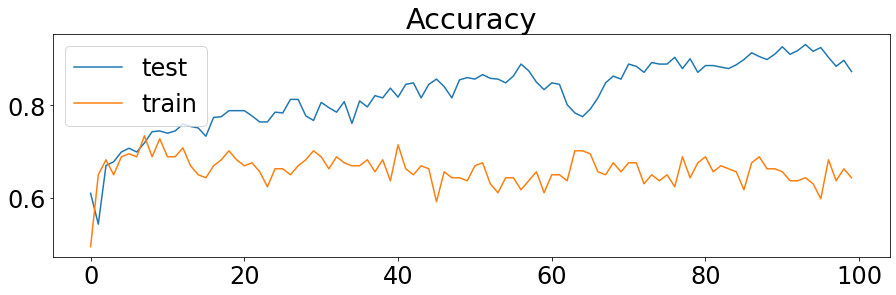

In [ ]:
plt.figure(figsize=(15,9))
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='test')
plt.plot(history.history['val_accuracy'], label='train')
plt.legend()
plt.show()